# Pandas for Data Analysis / *Análisis de datos con Pandas*
<h1 style="font-size:1.5em;color:#2467C0">The Scope / Objetivo </h1>

(EN) I will use the information gathered from the source files to improve the organization of ground operations teams for the airport of Atlanta, regarding Delta Air Lines flights.

*(ES) Usaré la información extraída de los archivos fuente para mejorar la organización de los equipos de operaciones en tierra para el aeropuerto de Atlanta, relacionados con los vuelos de Delta Air Lines.*

### (EN)
### Step 1: Acquiring Data 
### Step 2: Preparing Data 
* #### Exploring and Cleaning Data 
* #### Cleaning using filters 
* #### NaN or null values 
* #### Data quality review 
### Summary basics statistics 
### After doing some data munging let's do some plots 
* #### Annual plot 

### Step 3: Analysis 
### Step 4: Reporting 
---

### *(ES)*
### *Paso 1: Adquisición de datos* 
### *Paso 2: Acondicionar los datos*
* #### *Exploración y limpieza de la información* 
* #### *Limpieza usando filtros* 
* #### *NaN o valores nulos*
* #### *Otras revisiones sobre la calidad de los datos*
### *Estadísticas básicas*
### *Luego de haber adecuado-transformado los datos iniciales, hagamos unos gráficos* 
* #### *Gráfico anual*

### *Paso 3: Análisis*
### *Paso 4: Reporte*

### Step 1: Acquiring Data
Looking for a dataset to make this sample, in the following link I found the files used in this notebook. Special thanks to them for sharing this (and many other) information openly.

https://www.kaggle.com/usdot/flight-delays

The source files this time are two .csv files (airlines.csv and flights.csv).

### *Paso 1: Adquisición de datos*
*Durante la búsqueda de datos para este ejemplo, en el siguiente enlace encontré los archivos que uso a continuación. Agradecimientos especiales a ellos por compartir esta (y mucha más) información abiertamente.*

*https://www.kaggle.com/usdot/flight-delays*

*Los archivos fuente en esta oportunidad son dos archivos .csv (airlines.csv and flights.csv).*

### Step 2: Preparing Data 

#### Exploring and Cleaning Data
Once the information is obtained, next step is to have an overall view of it, explore it and remove errors, empty fields (or fill them if the case), lack of information, null values and/or what is not right nor useful.

### *Paso 2: Acondicionar los datos*
#### *Exploración y limpieza de la información* 
*Una vez que la información es obtenida, es importante crear una visión general de la misma, explorarla y eliminar errores, campos vacíos (o completarlos si es el caso), faltas de información, valores nulos y/o lo que no está bien ni es útil.*

In [1]:
import pandas as pd

(EN) To get an idea of the dataframe dimensions, I'll do the following.

*(ES) Para tener una idea de las dimensiones de los datos (dataframe), haré lo siguiente.*

In [2]:
airlines_df = pd.read_csv('airlines.csv', sep = ',')
print(airlines_df.shape)

(14, 2)


In [3]:
airlines_df

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [4]:
flights_df = pd.read_csv('flights.csv', sep = ',')
print(flights_df.shape)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(5819079, 31)


(EN) Since I'm reading that there is a DtypeWarning in columns 7 and 8, let's see what are their names.

*(ES) Como veo que hay una advertencia DtypeWarning relacionada con las columnas 7 y 8, voy a ver cuáles son sus nombres.*

In [5]:
flights_df.columns[[7, 8]]

Index(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], dtype='object')

(EN) In this case, the column 'DESTINATION_AIRPORT' happens to be critical for the analysis. I can't just delete the column, so I'm going to go deeper in this warning to see what I have. To satisfy the DRY principle, I wrote the following function.

*(ES) En este caso, la columna 'DESTINATION_AIRPORT' resulta ser crítica para el análisis. No puedo simplemente eliminarla, así que voy a profundizar un poco a ver qué hay. Para cumplir con el principio DRY, escribí la siguiente función.*

In [6]:

def get_column_type(string):
    """
    Input: string -> column name
    Output: print set of values types within the column.
    Notice that it is coded to work all the time over a dataframe named: flights_df
    """
    dtype_column = set()
    for row in flights_df[string]:
        dtype_column.add(type(row))
    print(dtype_column)
    return None

get_column_type('ORIGIN_AIRPORT')
get_column_type('DESTINATION_AIRPORT')


{<class 'int'>, <class 'str'>}
{<class 'int'>, <class 'str'>}


(EN) Now I know the "size" of the issue, let's keep going, I'll come back to this later. Let's take a look to the columns header names to have an overall idea of the info the dataframe contains.

*(ES) Ahora ya sé el 'tamaño' del problema, voy a continuar y luego retomo esta incidencia. Ahora echaré un vistazo a los encabezados de cada columna para hacerme una idea de la información que contiene.*

In [7]:
flights_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [8]:
#(EN) Let's take a look to the 'head' of the dataframe (first 5 rows as default). 
# Could be less or more. e.g. dataframe_name.head(3)

#(ES) Vamos a echar un vistazo a la cabecera de la tabla (preprogramadas, primeras 5 filas).
# Podría ser menos o más. ej. dataframe_name.head(3)
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


(EN) I want to see how many flights there are in the top 5 of all of the airports from the dataframe. Notice I will work on the information of Atlanta's airport, therefore, if I only want the count of Atlanta, I can use: 

*(ES) Quiero ver cuántos vuelos hay en los 5 primeros puestos de entre todos los aeropuertos de la tabla. Recordemos que me enfocaré en la información relacionada con los vuelos del aeropuerto de Atlanta, por lo tanto, si solo quisiera la cantidad de vuelos de Atlanta, usaría:*

    flights_df['DESTINATION_AIRPORT'].value_counts()['ATL']

(EN) In this case ATL is within the top 5, so it's enough with the following.

*(ES) En este caso ATL está entre los primeros 5, así que es suiciente con lo siguiente.*

In [9]:
flights_df['DESTINATION_AIRPORT'].value_counts()[:5]

ATL    346904
ORD    285906
DFW    239582
DEN    196010
LAX    194696
Name: DESTINATION_AIRPORT, dtype: int64

#### Cleaning using filters
Here I'm creating a filter to get a dataframe with all the flights with ATL as their destination airport, as I'm using the same dataframe name as before it will result in a cleaning operation, all the not matching rows will be ignored. After that, I'm printing the shape to confirm that the number of rows and the previous ATL flights count, match to each other.

#### *Limpieza usando filtros*
*Aquí estoy creando un filtro para obtener una tabla con los vuelos que tienen como destino el aeropuerto de ATL, como estoy utilizando para la tabla el mismo nombre que usé antes, terminará siendo una operación de limpieza, ya que todas las filas que no cumplan con el filtro serán ignoradas. Después, ejecuto el comando que expresa la cantidad de filas y columnas de la tabla para confirmar que coincide con la cantidad de vuelos obtenida justo antes.*

In [10]:
ATL_airport_filtering = flights_df['DESTINATION_AIRPORT'] == 'ATL'
flights_df = flights_df[ATL_airport_filtering]
flights_df.shape

(346904, 31)

(EN) The previous filter should have eliminate the different types warning I had before, so here I'm checking that the issue is indeed gone, using the same function as before.

*(ES) El filtro anterior ha debido eliminar la incidencia previa que había en dicha columna ("different types warning"), así que ahora reviso que de hecho se haya solucionado usando la misma función que antes.*

In [11]:
get_column_type('DESTINATION_AIRPORT')

{<class 'str'>}


(EN) The second conditional is getting the flights operated by Delta Air Lines. Same as before...

*(ES) La segunda condición importante, es obtener solo los vuelos operados por Delta Air Lines. Así que, al igual que antes...*

In [12]:
flights_df['AIRLINE'].value_counts()

DL    221673
EV     57056
WN     39508
AA      7499
F9      4492
NK      4372
OO      4227
UA      3412
US      2940
MQ      1295
AS       430
Name: AIRLINE, dtype: int64

In [13]:
#(EN) Same here about the filter and matching values but the filter is to get a dataframwe for only Delta Air Lines flights.
#(ES) La misma operación de filtrado, solo que ahora es de los vuelos de Delta Air Lines.
DL_flights_filtering = flights_df['AIRLINE'] == 'DL'
flights_df = flights_df[DL_flights_filtering]
flights_df.shape

(221673, 31)

#### More cleaning... 
The prescence of the column 'DIVERTED' and 'CANCELLED' suggest that there might be some Delta flights that actually didn´t arrive to ATL airport, so let's take a look of them.

#### *Sigue la limpieza...* 
*La presencia the la columna 'DIVERTED' (desviado) y 'CANCELLED' (cancelado), sugiere que podrían haber vuelos en la tabla que nunca llegaron al aeropuerto de ATL, así que vamos a echar un vistazo a ver qué hay.*

In [14]:
print(flights_df['DIVERTED'].value_counts())
print(flights_df['CANCELLED'].value_counts())

0    220994
1       679
Name: DIVERTED, dtype: int64
0    220685
1       988
Name: CANCELLED, dtype: int64


(EN) It's commonly used 0 to represent False and 1 to represent True values. To confirm that, run the following.

*(ES) Es común ver que se use el valor 0 para representar como respuesta algo que es Falso, y el valor 1 para lo Cierto. Para confirmar esto, se puede ejecutar lo siguiente.*

In [17]:
print((1 == True), (0 == False))

True True


(EN) Now, using a filter, I'm going to get rid of them since I want to focus on the flights that actually arrived in or out of their scheduled time (for minutes, not days).

*(ES) Ahora, usando un filtro, voy a eliminar de la tabla dichos vuelos ya que me voy a enfocar en los vuelos que realmente llegaron en o fuera de su hora programada (por minutos, no días).*

In [15]:
DIVERTED_flights_filtering = flights_df['DIVERTED'] == 0
flights_df = flights_df[DIVERTED_flights_filtering]
flights_df.shape

(220994, 31)

In [16]:
# (EN) Same for CANCELLED column...
# (ES) Igual para la columna CANCELLED...
CANCELLED_flights_filtering = flights_df['CANCELLED'] == 0
flights_df = flights_df[CANCELLED_flights_filtering]
flights_df.shape

(220006, 31)

(EN) Now let's take a look to 'CANCELLATION_REASON' to see if it's useful after deleting all the cancelled flights.

*(ES) Ahora echaré un vistazo a la columna 'CANCELLATION_REASON' (motivo de la cancelación) para ver si, después de haber eliminado todos los vuelos cancelados, sigue teniendo información útil.*

In [17]:
flights_df['CANCELLATION_REASON'].value_counts()

Series([], Name: CANCELLATION_REASON, dtype: int64)

(EN) ... it's empty as expected. So I'm going to remove the column from the dataframe. The shape value will end in 30 instead 
 of 31.
 
 *(ES) ... como era de esperar, está vacía. Así que voy a eliminar la columna de la tabla. Ahora, la 'forma' (cantidad de columnas) de la tabla debería cambiar a 30 en lugar de 31.*

In [18]:
del flights_df['CANCELLATION_REASON']
flights_df.shape

(220006, 30)

#### NaN or null values 
As one of the most important steps during exploration-cleaning process, is to know if there are null or NaN (not a number) values in the dataframe, and where there are if any. To know that I'm going to use the following function.

#### *NaN o valores nulos*
*Entre uno de los pasos más importantes durante el proceso de exploración-limpieza de datos, está saber si entre los datos hay valores nulos o NaN, y dónde están si los hay. Para averiguarlo, voy a usar la siguiente función.*

In [19]:
flights_df.isnull().any()

YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER            False
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME         False
DEPARTURE_DELAY        False
TAXI_OUT               False
WHEELS_OFF             False
SCHEDULED_TIME         False
ELAPSED_TIME           False
AIR_TIME               False
DISTANCE               False
WHEELS_ON              False
TAXI_IN                False
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME           False
ARRIVAL_DELAY          False
DIVERTED               False
CANCELLED              False
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

(EN) In this case, it is expected to have null values within the columns that are used to clasify the delays. And not having null values in the general delay column ['ARRIVAL_DELAY'].

*(ES) En este caso, es de esperar que hayan valores nulos en las columnas usadas para clasificar los retrasos. Y que no hayan valores nulos en la columna de retrasos en general ['ARRIVAL_DELAY'].*

#### Data quality review 
Not having null values is just one of the things to be aware of, so I'm going to take a look to the information within the columns ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK'] to confirm that there are no outliers values like a 15th month or things like that.

#### *Otras revisiones sobre la calidad de los datos*
*No tener valores nulos es solo uno de los aspectos a tener en cuentaa, así que voy a revisar el contenido de las columnas ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK'] (año, mes, día, día de la semana) para asegurar que no hay valores que se salgan del rango lógico o coherente, como tener un mes número 15 o cosas por el estilo.*

In [20]:
dates_list = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK']
for i in dates_list:
    print(str(i), 'values are:', flights_df[i].unique().tolist())

YEAR values are: [2015]
MONTH values are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12]
DAY values are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
DAY_OF_WEEK values are: [4, 5, 6, 7, 1, 2, 3]


(EN) Everything looks normal but the absence of the 10th month... something to notice. In a real world scenario, this lack of information should be something to discuss.

In this case and for simplicity I'm only going to explain what I did once I saw this result.
* I reload the csv file with a new dataframe name, in this way I wouldn't affect the evolution achieved till this point in time.
* I ran the .unique().tolist() command on the ['MONTH'] column. And I saw there is a 10th month within the records.
* I created a new dataframe filtering the 10th month to have only that records.
* I filtered all Delta flights in the dataframe and removed the everything else.
* I ran the .unique().tolist() command on the ['DESTINATION_AIRPORT'] column. Then I saw that all the records according to 
 month 10 and Delta flights has as destination airport a number, instead a string code like one I'm working on i.e. ATL. 
It means that when I filtered the destination airport in previous steps, I remove the records for month 10. In a real world scenario I would have to find out which number match with Atlanta airport and use the replace function. In this way I would have the records for month 10, and I'll be sure that I haven't remove any record accidentally.

*(ES) Todo parece normal excepto la ausencia del décimo mes... algo a tener en cuenta. En un escenario real, esta falta de información sería algo que habría que discutir.*

*En este caso y para simplificar el desarrollo del ejemplo solo voy a explicar lo que hice cuando vi estos resultados.*
+ *Volví a cargar el archivo con un nombre distinto para no afectar el desarrollo alcanzado hasta el momento.*
+ *Ejecuté el comando .unique().tolist() en la columna ['MONTH']. Encontré que sí hay registros para el mes 10.*
+ *Filtré todos los vuelos de Delta en la tabla y eliminé todos los demás.*
+ *Ejecuté el comando .unique().tolist() en la columna ['DESTINATION_AIRPORT']. Vi que todos los registros correspondientes al mes 10 y a los vuelos Delta tienen como aeropuerto de destino un número en lugar de un código de letras como el que estoy usando, es decir, ATL.*
*Esto quiere decir que cuando filtré los aeropuertos de destino en los pasos previos, eliminé todos los registros del mes 10. En un escenario real, tendría que averiguar cuál es el número asignado al aeropuerto de ATL, ver si coincide y usar la función replace para reemplazar un valor por otro. De esta forma, tendría los registros del mes 10, y estaría seguro de que no he borrado datos accidentalmente.*

### Summary basics statistics 
Since I'm focused in the column ['ARRIVAL_DELAY'] for this analysis, I will perform some summary basics statistics functions contained in Pandas over this column, i.e. mode, median, mean, range and standard deviation.

### *Estadísticas básicas* 
*Dado que el enfoque principal de este ejemplo recae sobre la columna ['ARRIVAL_DELAY'], sobre la información que contiene dicha columna aplicaré un resumen de funciones estadísticas básicas contenidas en Pandas, es decir, moda, mediana, media, rango y desviación estándar.* 

In [21]:
print('Arrival delay records has a mean of:', flights_df['ARRIVAL_DELAY'].mean())
print('Arrival delay records has a median of:', flights_df['ARRIVAL_DELAY'].median())
print('Arrival delay records has a standard deviation of:', flights_df['ARRIVAL_DELAY'].std())
print('Arrival delay records has as min and max values:', flights_df['ARRIVAL_DELAY'].min(), 'and', 
      flights_df['ARRIVAL_DELAY'].max())

Arrival delay records has a mean of: -0.8377498795487396
Arrival delay records has a median of: -9.0
Arrival delay records has a standard deviation of: 42.37335648800153
Arrival delay records has as min and max values: -77.0 and 1274.0


In [22]:
#(EN) Also the following is useful.
#(ES) También es útil lo siguiente.

flights_df['ARRIVAL_DELAY'].describe()

count    220006.000000
mean         -0.837750
std          42.373356
min         -77.000000
25%         -16.000000
50%          -9.000000
75%           1.000000
max        1274.000000
Name: ARRIVAL_DELAY, dtype: float64

* (EN) I'm going to create new and shorter dataframes for future plotting.
* *(ES) Voy a crear una tabla distinta y más pequeña para los próximos gráficos.*

In [23]:
reduced_flights_df = pd.DataFrame(flights_df[['MONTH', 'DAY', 'ARRIVAL_DELAY']])

(EN) In the following, I'm filtering each month and creating a dataframe with it.

*(ES) A continuación, voy a crear una tabla de cada mes usando filtros.*

In [24]:
jan_filter = reduced_flights_df['MONTH'] == 1
jan_flights = reduced_flights_df[jan_filter]

feb_filter = reduced_flights_df['MONTH'] == 2
feb_flights = reduced_flights_df[feb_filter]

mar_filter = reduced_flights_df['MONTH'] == 3
mar_flights = reduced_flights_df[mar_filter]

apr_filter = reduced_flights_df['MONTH'] == 4
apr_flights = reduced_flights_df[apr_filter]

may_filter = reduced_flights_df['MONTH'] == 5
may_flights = reduced_flights_df[may_filter]

jun_filter = reduced_flights_df['MONTH'] == 6
jun_flights = reduced_flights_df[jun_filter]

jul_filter = reduced_flights_df['MONTH'] == 7
jul_flights = reduced_flights_df[jul_filter]

aug_filter = reduced_flights_df['MONTH'] == 8
aug_flights = reduced_flights_df[aug_filter]

sep_filter = reduced_flights_df['MONTH'] == 9
sep_flights = reduced_flights_df[sep_filter]

oct_filter = "There is no record == 10 in reduced_flights_df yet" #reduced_flights_df['MONTH'] == 10
oct_flights = "There is no record == 10 in reduced_flights_df yet" #reduced_flights_df[oct_filter]

nov_filter = reduced_flights_df['MONTH'] == 11
nov_flights = reduced_flights_df[nov_filter]

dec_filter = reduced_flights_df['MONTH'] == 12
dec_flights = reduced_flights_df[dec_filter]


(EN) Now I'm going to insert a new column to the each new dataframe called 'DATES', which I will use for the 'x' axis.
In this case:

    dataframe.insert(dataframe index in which I will insert the column, column name to be inserted, value to insert).
* value to insert = number of month + '.' + day <- I want to create and use this info as benchmarks for x axis.

*(ES) Ahora voy a insertar, a cada tabla, una columna nueva llamada 'DATES', y la usaré para el eje de las 'x'.*

    dataframe.insert(índice de la tabla en el que insertar la columna, nombre de la columna a insertar, valor a insertar).
* *valor a insertar = número del mes + '.' + día <- esto lo usaré como indicadores en el eje 'x'.*

In [25]:
jan_flights.insert(2, 'DATES', 1+(jan_flights['DAY']/100))

feb_flights.insert(2, 'DATES', 2+(feb_flights['DAY']/100))

mar_flights.insert(2, 'DATES', 3+(mar_flights['DAY']/100))

apr_flights.insert(2, 'DATES', 4+(apr_flights['DAY']/100))

may_flights.insert(2, 'DATES', 5+(may_flights['DAY']/100))

jun_flights.insert(2, 'DATES', 6+(jun_flights['DAY']/100))

jul_flights.insert(2, 'DATES', 7+(jul_flights['DAY']/100))

aug_flights.insert(2, 'DATES', 8+(aug_flights['DAY']/100))

sep_flights.insert(2, 'DATES', 9+(sep_flights['DAY']/100))

# oct_flights.insert(2, 'DATES', 10+(oct_flights['DAY']/100))

nov_flights.insert(2, 'DATES', 11+(nov_flights['DAY']/100))

dec_flights.insert(2, 'DATES', 12+(dec_flights['DAY']/100))


(EN) Let's take a look to some of them: e.g. May and November.

*(ES) Vamos a echar un vistazo a, como por ejemplo, Mayo y Noviembre.*

In [26]:
print(may_flights.head(), '\n', nov_flights.tail())

         MONTH  DAY  DATES  ARRIVAL_DELAY
1888630      5    1   5.01            7.0
1888635      5    1   5.01          -23.0
1888663      5    1   5.01           -2.0
1888666      5    1   5.01            3.0
1888753      5    1   5.01           -9.0 
          MONTH  DAY  DATES  ARRIVAL_DELAY
5339682     11   30   11.3            5.0
5339685     11   30   11.3            4.0
5339719     11   30   11.3          -13.0
5339748     11   30   11.3          -18.0
5339798     11   30   11.3          -18.0


(EN) For this analysis I will create an overall-annual plot. So I'm going to concatenate all the monthly dataframes, similar to reduced_flights_df dataframe (but now I have a new column).

*(ES) Para este análisis crearé un gráfico general de todo el año. Para ello, voy a unir consecutivamente las tablas de cada mes, similar a la tabla reduced_flights_df (pero ahora hay una columna nueva).*

In [27]:
annual_group = pd.concat([jan_flights, feb_flights, mar_flights, apr_flights, may_flights, jun_flights, jul_flights, 
                         aug_flights, sep_flights, nov_flights, dec_flights])

In [28]:
#(EN) I'm going to use dataframe.value_counts() to confirm the concatenation was OK.
#(ES) Voy a usar dataframe.value_counts() para confirmar que se unió todo correctamente.

annual_group['MONTH'].value_counts()

8     21539
7     21428
3     20872
5     20736
6     20612
11    20168
4     20126
9     20068
12    19136
1     18416
2     16905
Name: MONTH, dtype: int64

### After doing some data munging let's do some plots 

### *Luego de haber adecuado-transformado los datos iniciales, hagamos unos gráficos* 

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

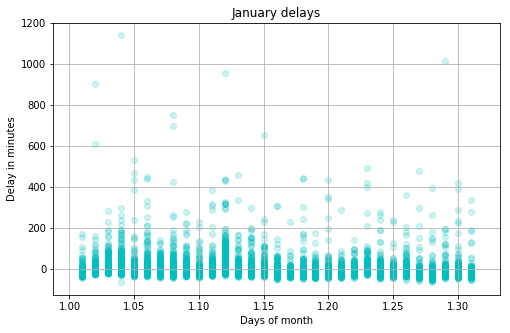

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(jan_flights['DATES'], jan_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.xlabel('Days of month')
plt.ylabel('Delay in minutes')
plt.title('January delays')
plt.grid(True)
plt.show()

+ (EN) In the case of January, it seems that the range of time in which most of the flights are is between -60min and +200min, but I'm going to take a deeper look to see it more in detail using:

        plt.ylim(lowest num of range, highest num of range)

    This function changes the displayed range of the 'y' axis from previous figure as follow:


+ *(ES) En el caso de Enero, parece que el rango de tiempo en el que se encuentran la mayoría de los vuelos está entre -60min y +200min, pero voy a revisar más detalladamente estos datos usando:*

        plt.ylim(parte baja del rango, parte alta del rango)

    *Esta función cambia el rango del eje 'y' mostrado anteriormente al indicado en la función.*

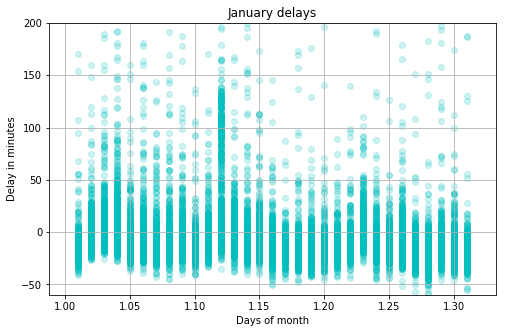

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(jan_flights['DATES'], jan_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.ylim(-60, 200)  # <-- *
plt.xlabel('Days of month')
plt.ylabel('Delay in minutes')
plt.title('January delays')
plt.grid(True)
plt.show()

(EN) After this closer plot, I can see that the most populated range is from -50 to +50 minutes. The plotting-exploring idea will be the same for the rest of the year, but let's take a look to every month.

*(ES) Después de ver más de cerca los datos, se puede notar que el rango de tiempo en el que se encuentran la mayoría de los vuelos está entre -50 y +50 minutos. La idea de graficar-explorar será la misma para el resto de los meses, pero veámoslos.*

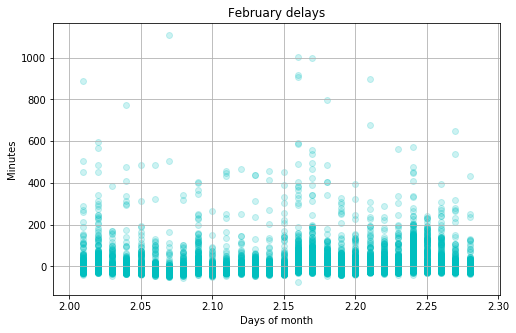

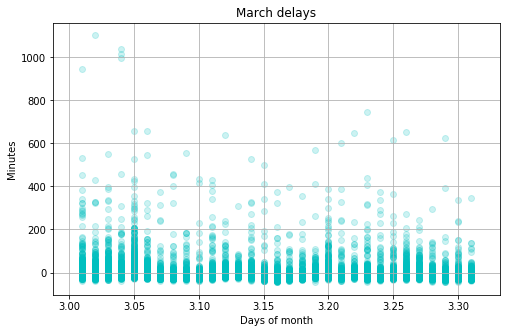

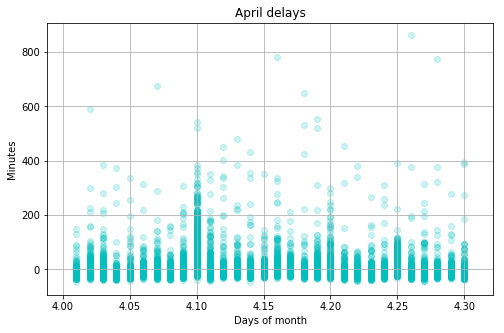

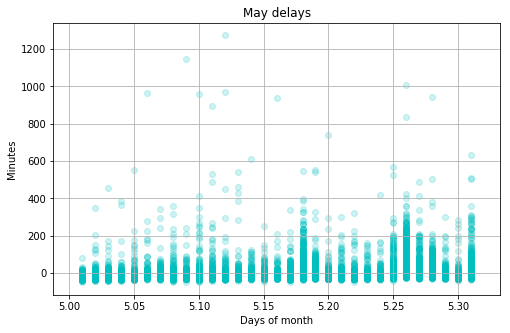

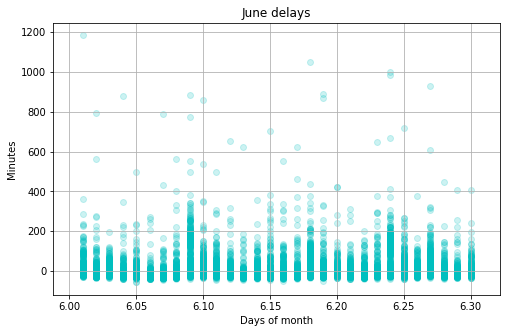

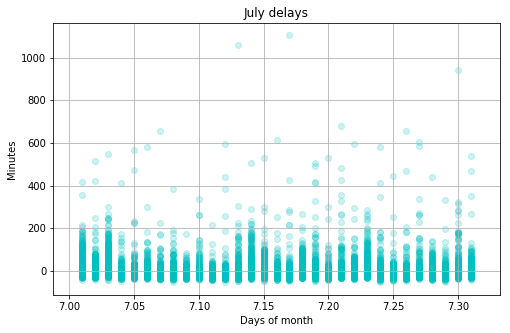

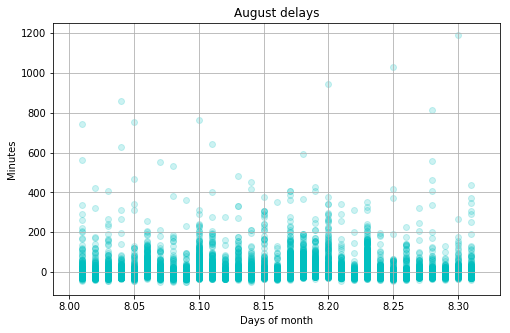

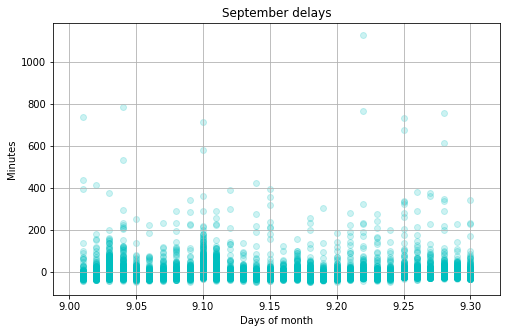

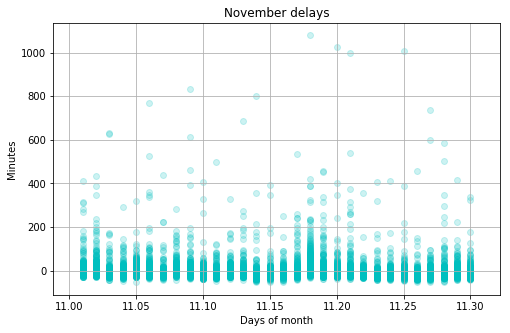

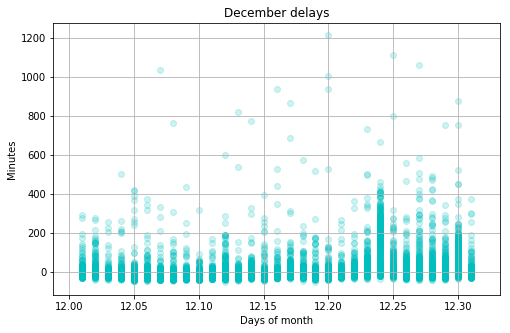

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(feb_flights['DATES'], feb_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.xlabel('Days of month')
plt.ylabel('Minutes')
plt.title('February delays')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(mar_flights['DATES'], mar_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.xlabel('Days of month')
plt.ylabel('Minutes')
plt.title('March delays')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(apr_flights['DATES'], apr_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.xlabel('Days of month')
plt.ylabel('Minutes')
plt.title('April delays')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(may_flights['DATES'], may_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.xlabel('Days of month')
plt.ylabel('Minutes')
plt.title('May delays')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(jun_flights['DATES'], jun_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.xlabel('Days of month')
plt.ylabel('Minutes')
plt.title('June delays')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(jul_flights['DATES'], jul_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.xlabel('Days of month')
plt.ylabel('Minutes')
plt.title('July delays')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(aug_flights['DATES'], aug_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.xlabel('Days of month')
plt.ylabel('Minutes')
plt.title('August delays')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(sep_flights['DATES'], sep_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.xlabel('Days of month')
plt.ylabel('Minutes')
plt.title('September delays')
plt.grid(True)
plt.show()

#plt.figure(figsize=(8,5))
#plt.scatter(oct_flights['DATES'], oct_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
#plt.xlabel('Days of month')
#plt.ylabel('Minutes')
#plt.title('October delays')
#plt.grid(True)
#plt.show()

plt.figure(figsize=(8,5))
plt.scatter(nov_flights['DATES'], nov_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.xlabel('Days of month')
plt.ylabel('Minutes')
plt.title('November delays')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(dec_flights['DATES'], dec_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.xlabel('Days of month')
plt.ylabel('Minutes')
plt.title('December delays')
plt.grid(True)
plt.show()

(EN) From the previous plots, it seems that September was particularly close to the estimated arrival time, so I'm going to take a closer look and I'm going to change the 'y' ticks from the original scale to a smaller one.

*(ES) En los gráficos anteriores parece que septiembre estuvo particularmente cerca de la hora de llegada prevista, así que reduciré nuevamente la escala y además aumentaré la frecuencia con la que se indican los intérvalos de minutos.*

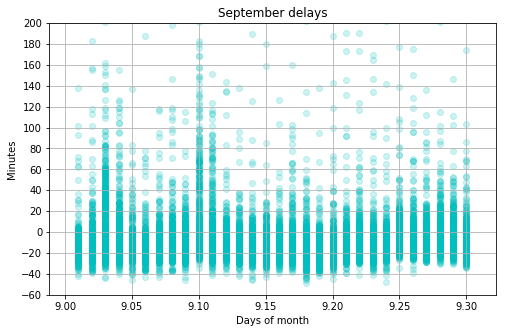

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(sep_flights['DATES'], sep_flights['ARRIVAL_DELAY'], c='c', alpha=0.2)
plt.ylim(-60, 200)
plt.yticks(np.linspace(-60, 200, 14)) # <-(EN) parameters: (lowest tick, highest tick, num of ticks between both included)
                              # <-(ES) parámetros: (valor mínimo del rango, valor máximo del rango, número de marcas totales)
plt.xlabel('Days of month')
plt.ylabel('Minutes')
plt.title('September delays')
plt.grid(True)
plt.show()

(EN) Opposite to what I thought, there is not such a difference, maybe 10min different from January. However, looks like it is more homogenous.

*(ES) Contrario a lo que pensaba, no hay tal diferencia, quizá 10min de diferencia respecto a Enero. Sin embargo, parece más homogéneo.*

#### Annual plot 
Grouping too much information is usually not the best option, however, I will plot the whole year to take a look of it.

#### *Gráfico anual* 
*Agrupar mucha información normalmente no es buena idea, no obstante, haré un gráfico de todo el año solo para echar un vistazo.*

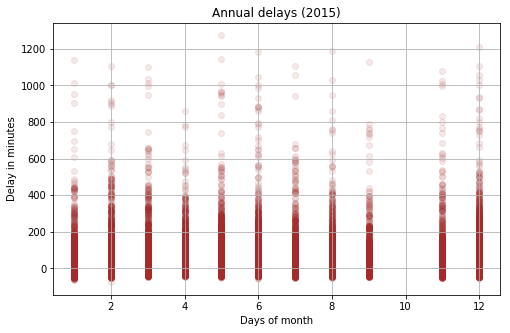

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(annual_group['MONTH'], annual_group['ARRIVAL_DELAY'], c='brown', alpha=0.1)
plt.xlabel('Days of month')
plt.ylabel('Delay in minutes')
plt.title('Annual delays (2015)')
plt.grid(True)
plt.show()

### Step 3: Analysis 
From the previous information I would briefly say:
* To be considered, there are a substantial number of values in the range between +50 and +400 minutes along the year.
* The most frequent range during the year that holds the variation in the arrival time is -50 and +50 minutes.
* June, July and August might need a temporary increase of resources, some other special dates as well.

### *Paso 3: Análisis*
*De la información previa, en resumen diría que:*
+ *Se debe tener en cuenta que hay una cantidad importante de valores en el rango de +50 y +400 minutos a lo largo del año.*
+ *El rango más frecuente de tiempo que contiene la mayoría de las variaciones es desde -50 a +50 minutos.*
+ *Junio, Julio y Agosto podrían necesitar un incremento temporal de recursos, así como otras fechas especiales.*

### Step 4: Reporting 
Following the essence of the first idea: "...improve the organization of ground operations teams for the airport of Atlanta, regarding Delta Air Lines flights.", I would say that my report would be focused in the employees shifts and how much time is needed to increase to handle this arriving time oscillations.

### *Paso 4: Reporte* 
*Respetando la esencia de la idea inicial: "...mejorar la organización de los equipos de operaciones en tierra para el aeropuerto de Atlanta, relacionados con los vuelos de Delta Air Lines.", diría que mi reporte estaría enfocado en los horarios de los turnos de los empleados y en cuánto tiempo es necesario modificar dichos turnos para manejar dichas oscilaciones.*